Params: encode_geom, geom_col and everything in kwargs are deprecated and not being used any more


c:\data\python37\lib\site-packages\carto\sql.py:229: UserWarning: Batch SQL job created with job_id: 18e13770-65de-4f52-9358-b84bc60764f4
  warnings.warn('Batch SQL job created with job_id: {job_id}'.format(job_id=data['job_id']))


Table successfully written to CARTO: https://bartomolina.carto.com/dataset/kc_house_data


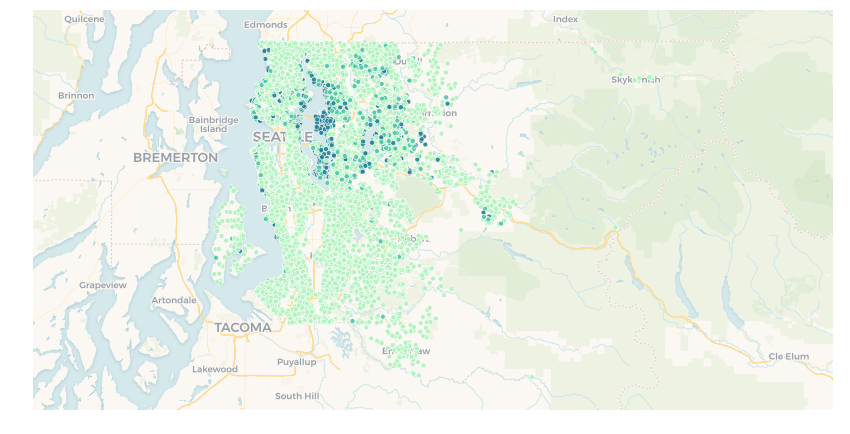

In [2]:
# we use dotenv to use CARTO API key: https://carto.com/signup/
# use .env.example as a reference
import os
from dotenv import load_dotenv
load_dotenv()

import pandas as pd

# CARTOframes imports
import cartoframes
from cartoframes import Credentials, Layer, styling

# import CARTO key
USERNAME = os.getenv("CARTO_USERNAME")
APIKEY = os.getenv("CARTO_KEY")
creds = Credentials(username=USERNAME, 
                    key=APIKEY)
cc = cartoframes.CartoContext(creds=creds)

# load the dataset
df = pd.read_csv('kc_house_data.csv')
df['id'] = df['id'].astype('float64')

# export the dataframe into a CARTO table
cc.write(df,
         table_name='kc_house_data',
         lnglat=('long', 'lat'),
         overwrite=True)

cc.map(layers=Layer('kc_house_data',
                    color={'column': 'price', 'scheme': styling.tealGrn(bins=3, bin_method='headtails')},
                    size=5), interactive=False)